
# Práctica 1: Modelo Poblacional Logístico (Parte 2)
## Jordi Blasco Lozano

**Enunciado general.**  
En este cuaderno estudiaremos un modelo poblacional **logístico** aplicado a un caso real: una población de **conejos** $N(t)$ que vive en un campo cuya **capacidad de carga** $K$ viene determinada por la **capacidad de producir zanahorias**. Analizaremos y compararemos la **solución analítica** y la **solución numérica**, mostraremos **gráficas de $N(t)$** y el **campo de crecimiento** (slope field), y añadiremos **interactividad** con los parámetros del sistema y la condición inicial. En cada ejercicio encontrarás:
- Un **enunciado** con lo que se pide.
- Bloques de **preguntas y reflexión**.
- Debes generar un nuevo bloque con el código que se pide en cada ejercicio.

## Ejemplo de funciones para gráficas

A continuación se muestra el código, organizado en funciones, para poder mostrar diagramas de fase y campos de crecimiento:


In [1]:

# =========================================
# Importaciones y utilidades comunes
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

try:
    from ipywidgets import interact, FloatSlider, IntSlider
    import ipywidgets as widgets
except Exception as e:
    print("Si ipywidgets no está disponible, instala con: pip install ipywidgets y reinicia el entorno.")

plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True

def logistic_rhs(t, N, r, K):
    return r * N * (1 - N / K)

def logistic_analytical(t, r, K, N0):
    t = np.asarray(t)
    if K <= 0:
        return np.full_like(t, np.nan, dtype=float)
    if N0 == 0.0:
        return np.zeros_like(t, dtype=float)
    A = (K - N0) / N0
    return K / (1.0 + A * np.exp(-r * t))

def growth_field_logistic(r, K, N0=None, N_max=None, n_N=200):
    # Graficar dN/dt como función de N, con punto en la CI
    if N_max is None:
        N_max = K * 1.5 if K > 0 else 10.0
    N_values = np.linspace(0, N_max, n_N)
    dNdt = logistic_rhs(0, N_values, r, K)

    plt.figure()
    plt.plot(N_values, dNdt, lw=2, label="dN/dt vs N")
    plt.axvline(K, linestyle='--', label='Cap. de carga K')
    if N0 is not None:
        plt.scatter([N0], [logistic_rhs(0, N0, r, K)], c='red', s=60, label="C.I.")
    plt.xlabel("N (conejos)")
    plt.ylabel("dN/dt")
    plt.title("Campo de crecimiento: dN/dt en función de N")
    plt.legend()
    plt.show()



## Ejercicio 1. Modelo poblacional logístico (conejos y zanahorias): analítico vs. numérico

**Contexto real.**  
Supón una población de **conejos** $N(t)$ en un campo. La capacidad de carga $K$ depende de cuántas **zanahorias** puede producir el campo (alimento disponible). El crecimiento se modela como:
$$
\frac{dN}{dt} = r\,N\Bigl(1 - \frac{N}{K}\Bigr), \quad r>0,\; K>0.
$$
- $r$: tasa intrínseca de crecimiento de la población (ej., fecundidad neta).  
- $K$: capacidad de carga (máximo sostenible por el entorno — aquí: zanahorias disponibles).

**Tareas.**
1. Compara la **solución analítica** $N(t)$ con la **solución numérica** (misma C.I. $N(0)=N_0$).  
2. Dibuja:
   - La evolución $N(t)$, marcando con un **punto rojo** la **condición inicial**.
   - El **campo de crecimiento** (slope field) del modelo.

**A continuación se proporciona la solución:**


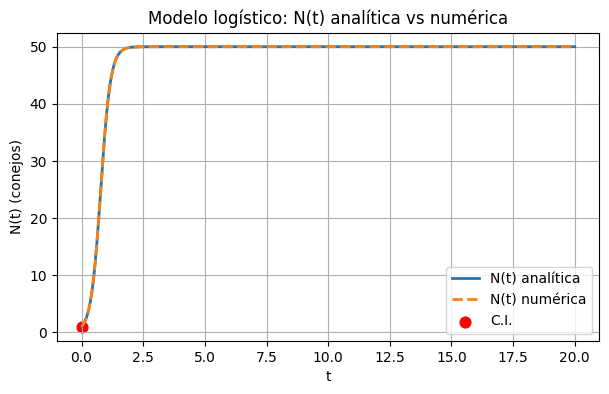

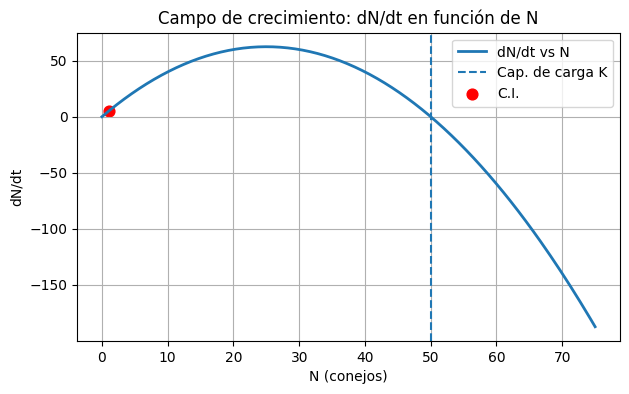

In [6]:
''' Parámetros por defecto
r = 0.8  
K = 50.0
N0 = 5.0
'''

r = 5  
K = 50.0
N0 = 1

t_max = 20.0
n_pts = 800
t = np.linspace(0, t_max, n_pts)

# Solución analítica
N_anal = logistic_analytical(t, r, K, N0)

# Solución numérica
def rhs(t, y): return logistic_rhs(t, y, r, K)
sol = solve_ivp(lambda _t, _y: rhs(_t, _y), [0, t_max], [N0], t_eval=t, rtol=1e-9, atol=1e-12)
N_num = sol.y[0]

# Gráfica N(t) analítica vs numérica
plt.figure()
plt.plot(t, N_anal, label="N(t) analítica", lw=2)
plt.plot(t, N_num, '--', label="N(t) numérica", lw=2)
plt.scatter([0], [N0], s=60, c='red', label="C.I.")
plt.xlabel("t")
plt.ylabel("N(t) (conejos)")
plt.title("Modelo logístico: N(t) analítica vs numérica")
plt.legend()
plt.show()

# Campo de crecimiento: dN/dt vs N
N_max_plot = max(1.5*K, 1.25*N0 + 1.0)
growth_field_logistic(r, K, N0=N0, N_max=N_max_plot)



> **Preguntas (responder en texto):**
> 1. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
>
> 2. Interpreta **razonadamente** el comportamiento observado para $N(t)$: ¿Cómo influye el valor de $r$?


### Respuestas al Ejercicio 1 - Parte 2

1.  **Clasificación del sistema:**
    *   **Relación entrada–salida:** Es un **sistema autónomo** (sin entrada externa). La ecuación `dN/dt = r*N*(1 - N/K)` no depende de ninguna fuerza o señal externa, solo de la propia población.
    *   **Tipo de incertidumbre:** Es **determinista**. Si conocemos `r`, `K` y `N0`, podemos predecir exactamente cómo evolucionará la población.
    *   **Naturaleza de tiempo:** Es de **tiempo continuo**. La población cambia de forma suave y continua.
    *   **Dependencia temporal:** Es **invariante en el tiempo**. Los parámetros `r` y `K` no cambian con el tiempo.

2.  **Comportamiento de N(t) e influencia de r:**
    El sistema muestra un crecimiento logístico con forma de S. Al principio, cuando `N` es pequeño, crece exponencialmente (como `r*N`). Pero conforme se acerca a la capacidad de carga `K`, el crecimiento se ralentiza hasta que la población se estabiliza en `K`.
    
    **Influencia de r:**
    *   **Si `r` es grande:** La población crece más rápido al principio y llega antes a `K`. La curva es más pronunciada.
    *   **Si `r` es pequeño:** El crecimiento es más lento y suave, tardando más en alcanzar `K`.
    
    En ambos casos, la población final siempre tiende a `K` (la capacidad de carga del ambiente).


## Ejercicio 2. Interacción con $r$, $K$ y la C.I.

**Enunciado.** Añade interactividad para variar $r$, $K$, $N_0$ y el tiempo de simulación $t_{\max}$. Debe actualizarse la comparación **analítica vs. numérica** de $N(t)$ y el **campo de crecimiento**.

> **Ejecuta y analiza estos tres casos de condiciones iniciales:**
> 1. $N_0 < K$ pero **cercano** a $K$.  
> 2. $N_0 > K$ pero **cercano** a $K$.  
> 3. $N_0 = K$.  
>
> **Explica y razona** qué ocurre en cada caso al simular.


### Respuestas al Ejercicio 2 - Parte 2

**Análisis de los tres casos de condiciones iniciales:**

1.  **Caso N₀ < K pero cercano a K (ej. N₀ = 45, K = 50):**
    La población empieza cerca de su capacidad máxima. Como aún hay espacio para crecer, la población aumenta lentamente hasta llegar a `K`. El crecimiento es muy suave porque el término `(1 - N/K)` es pequeño.

2.  **Caso N₀ > K pero cercano a K (ej. N₀ = 55, K = 50):**
    La población empieza por encima de la capacidad de carga. Esto significa que hay sobrepoblación. Por tanto, la población decrece hasta estabilizarse en `K`. El término `(1 - N/K)` es negativo, por lo que `dN/dt < 0`.

3.  **Caso N₀ = K (ej. N₀ = 50, K = 50):**
    La población empieza exactamente en el **punto de equilibrio**. Como `(1 - N/K) = 0`, tenemos `dN/dt = 0`. La población no cambia - se mantiene constante en `K` para siempre.

**Conclusión:** El punto `N = K` es un atractor: las poblaciones que empiecen por debajo crecen hacia él, las que empiecen por encima decrecen hacia él, y las que empiecen justo ahí se quedan ahí.

In [7]:
# Importamos las herramientas para interactividad
from ipywidgets import interact, FloatSlider, IntSlider

# Creamos la función que agrupa el código y la decoramos con @interact
@interact(
    r=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.8, description='r (Tasa crec.)'),
    K=FloatSlider(min=10.0, max=200.0, step=5.0, value=50.0, description='K (Cap. Carga)'),
    N0=FloatSlider(min=0.0, max=200.0, step=5.0, value=5.0, description='N0 (Pob. Inicial)'),
    t_max=IntSlider(min=5, max=100, step=5, value=20, description='t_max (Tiempo sim.)')
)
def interactive_logistic_model(r, K, N0, t_max):
    '''
    Aquí empaquetamos todo el código del ejercicio 1 en una función para hacerlo interactivo.
    
    1.  Usamos el decorador @interact para crear sliders para los parámetros clave.
    2.  Cada vez que mueves un slider, esta función se vuelve a ejecutar con los nuevos valores.
    3.  Calculamos y dibujamos tanto la solución analítica como la numérica para que puedas
        compararlas al instante mientras cambias los parámetros.
    '''
    # Parámetros de simulación
    n_pts = 800
    t = np.linspace(0, t_max, n_pts)

    # Solución analítica
    N_anal = logistic_analytical(t, r, K, N0)

    # Solución numérica
    def rhs(t, y): return logistic_rhs(t, y, r, K)
    sol = solve_ivp(lambda _t, _y: rhs(_t, _y), [0, t_max], [N0], t_eval=t, rtol=1e-9, atol=1e-12)
    N_num = sol.y[0]

    # Gráfica N(t) analítica vs numérica
    plt.figure()
    plt.plot(t, N_anal, label="N(t) analítica", lw=2)
    plt.plot(t, N_num, '--', label="N(t) numérica", lw=2)
    plt.axhline(K, color='gray', linestyle=':', label='K (Cap. de carga)')
    plt.scatter([0], [N0], s=60, c='red', label="C.I.", zorder=5)
    plt.xlabel("t")
    plt.ylabel("N(t) (conejos)")
    plt.title("Modelo logístico: N(t) analítica vs numérica")
    plt.legend()
    plt.ylim(bottom=0) # Aseguramos que el eje Y no sea negativo
    plt.show()

    # Campo de crecimiento: dN/dt vs N
    N_max_plot = max(1.5*K, 1.25*N0 + 1.0)
    growth_field_logistic(r, K, N0=N0, N_max=N_max_plot)


interactive(children=(FloatSlider(value=0.8, description='r (Tasa crec.)', max=2.0, min=0.1), FloatSlider(valu…